<a href="https://colab.research.google.com/github/Devarshik3/Prodigy_DS/blob/main/Prodigy_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 04 - Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

In [12]:
import pandas as pd
df = pd.read_csv('/content/Senitment_dataset.csv')
df.head()

,Id,Media,Sentiment,Message
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [13]:
df = df.drop_duplicates()

In [14]:
df = df.dropna()

In [15]:
df.to_csv('cleaned_sentiment_dataset.csv')

In [16]:
df =pd.read_csv('cleaned_sentiment_dataset.csv')
df.head()

,Unnamed: 0,Id,Media,Sentiment,Message
0,0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4,4433,Google,Neutral,Now the President is slapping Americans in the...


**SENTIMENT ANALIZATION**

1) Install library like textblob for sentiment analyze

In [17]:
!pip install textblob==0.17.1

2) Import library and generate code to give sentiment scores according to Positive, Negative, and Neutral

In [19]:
import pandas as pd
from textblob import TextBlob

df = pd.read_csv('cleaned_sentiment_dataset.csv')

def get_sentiment_score(text):
  blob = TextBlob(text)
  return blob.sentiment.polarity

df['sentiment_score'] = df['Sentiment'].apply(get_sentiment_score)

print (df)

     Unnamed: 0    Id                Media   Sentiment  \
0             0  3364             Facebook  Irrelevant   
1             1   352               Amazon     Neutral   
2             2  8312            Microsoft    Negative   
3             3  4371                CS-GO    Negative   
4             4  4433               Google     Neutral   
..          ...   ...                  ...         ...   
995         995  4891  GrandTheftAuto(GTA)  Irrelevant   
996         996  4359                CS-GO  Irrelevant   
997         997  2652          Borderlands    Positive   
998         998  8069            Microsoft    Positive   
999         999  6960      johnson&johnson     Neutral   

                                               Message  sentiment_score  
0    I mentioned on Facebook that I was struggling ...        -0.500000  
1    BBC News - Amazon boss Jeff Bezos rejects clai...         0.000000  
2    @Microsoft Why do I pay for WORD when it funct...        -0.300000  
3    CS

**SENTIMENT VISUALIZATION**

1) Pie chart to show the percentage distribution of different sentiments

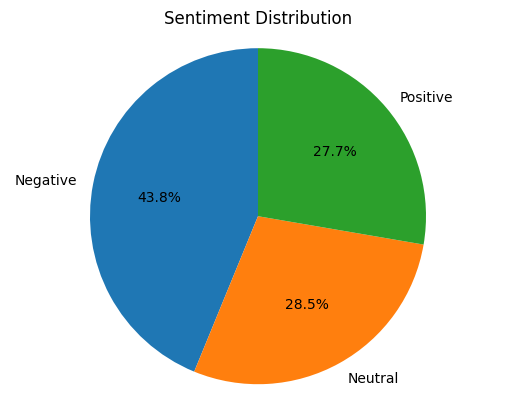

In [20]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Read the DataFrame from the CSV file
df = pd.read_csv('cleaned_sentiment_dataset.csv')

def get_sentiment_score(text):
  blob = TextBlob(text)
  return blob.sentiment.polarity

df['sentiment_score'] = df['Sentiment'].apply(get_sentiment_score)

# Categorize sentiment scores
df['sentiment_category'] = df['sentiment_score'].apply(lambda score:
    'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Count the number of occurrences for each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

2) Heatmap to show the distribution of sentiments according to different medias

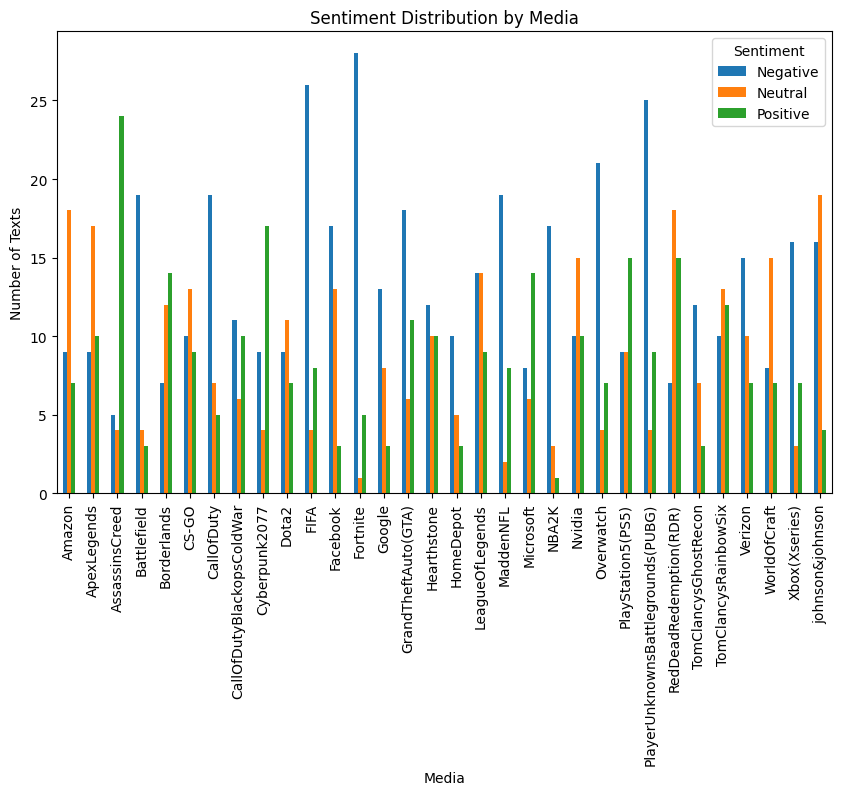

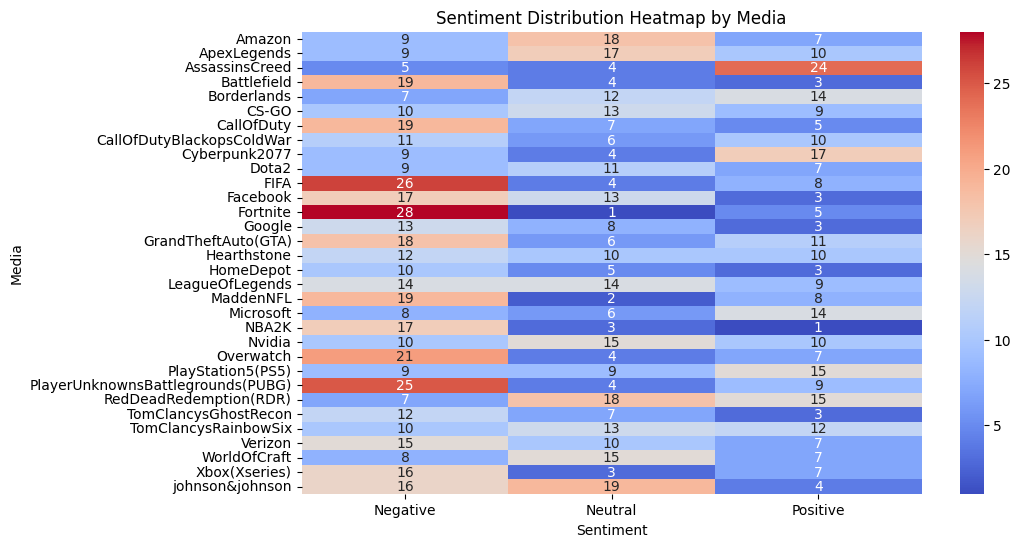

In [23]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Read the DataFrame from the CSV file
df = pd.read_csv('cleaned_sentiment_dataset.csv')

def get_sentiment_score(text):
  blob = TextBlob(text)
  return blob.sentiment.polarity

df['sentiment_score'] = df['Sentiment'].apply(get_sentiment_score)

# Categorize sentiment scores
df['sentiment_category'] = df['sentiment_score'].apply(lambda score:
    'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Group by media and sentiment category, then count occurrences
sentiment_by_media = df.groupby(['Media', 'sentiment_category'])['Sentiment'].count().unstack()

# Create a Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_by_media, annot=True, cmap='coolwarm', fmt='g')
plt.title('Sentiment Distribution Heatmap by Media')
plt.xlabel('Sentiment')
plt.ylabel('Media')
plt.show()